# Test Noise Variations

In [12]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import math

class NoisyObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env, noise_std=0.1, noise_type='gaussian', bias=0.0):
        super(NoisyObservationWrapper, self).__init__(env)
        self.noise_std = noise_std
        self.noise_type = noise_type
        self.bias = bias
        self.observation_space = env.observation_space
        
        # Define the range for each observation component
        self.obs_ranges = [
            2,  # cart position range is [-2.4, 2.4]
            0.5,  # cart velocity range is approximated as [-50, 50]
            math.radians(20),  # pole angle range is [-12 degrees, 12 degrees]
            math.radians(0.5)  # pole angular velocity range is approximated as [-50 degrees/s, 50 degrees/s]
        ]

    def observation(self, obs):
        if self.noise_type == 'gaussian':
            noise = np.random.normal(0, self.noise_std, size=obs.shape) * self.obs_ranges
        elif self.noise_type == 'uniform':
            noise = np.random.uniform(-self.noise_std, self.noise_std, size=obs.shape) * self.obs_ranges
        elif self.noise_type == 'exponential':
            noise = np.random.exponential(self.noise_std, size=obs.shape) * self.obs_ranges
        else:
            raise ValueError("Unsupported noise type")
        
        noisy_obs = obs + noise + self.bias
        return noisy_obs

def setup_noisy_environment(noise_std=0.1, noise_type='gaussian', bias=0.0):
    """
    Sets up the CartPole-v1 environment with noisy observations and runs a random policy to test it.
    """
    # Initialize the CartPole-v1 environment with and without noisy observations
    env = gym.make('CartPole-v1')
    noisy_env = NoisyObservationWrapper(env, noise_std, noise_type, bias)

    cart_positions = []
    pole_angles = []
    noisy_cart_positions = []
    noisy_pole_angles = []

    # Run a single episode with a random policy in the noisy environment
    observation, info = noisy_env.reset()
    done = False

    while not done:
        action = noisy_env.action_space.sample()  # Random action
        noisy_observation, reward, done, truncated, _ = noisy_env.step(action)
        observation, reward, done, truncated, _ = env.step(action)
        
        cart_positions.append(observation[0])  # Ground truth cart position
        pole_angles.append(observation[2])  # Ground truth pole angle
        noisy_cart_positions.append(noisy_observation[0])  # Noisy cart position
        noisy_pole_angles.append(noisy_observation[2])  # Noisy pole angle
        print(f"Noisy Observation: {noisy_observation} | Ground Truth: {observation} | Reward: {reward} | Done: {done}")

        if done:
            break  # Exit the loop if the episode has ended

    env.close()
    noisy_env.close()

    # Plot the cart positions and pole angles
    title = f"Noise Type = {noise_type}, Noise Std = {noise_std}, Bias = {bias}"
    plot_comparisons(cart_positions, noisy_cart_positions, pole_angles, noisy_pole_angles, title)

def plot_comparisons(cart_positions, noisy_cart_positions, pole_angles, noisy_pole_angles, title=""):
    """
    Plots the ground truth and noisy cart positions and pole angles over time.
    """
    time_steps = range(len(cart_positions))

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_steps, cart_positions, label='Ground Truth Cart Position')
    plt.plot(time_steps, noisy_cart_positions, label='Noisy Cart Position', linestyle='--')
    plt.xlabel('Time Steps')
    plt.ylabel('Cart Position')
    plt.title(f'Cart Position over Time: ({title})')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(time_steps, pole_angles, label='Ground Truth Pole Angle')
    plt.plot(time_steps, noisy_pole_angles, label='Noisy Pole Angle', linestyle='--')
    plt.xlabel('Time Steps')
    plt.ylabel('Pole Angle (radians)')
    plt.title(f'Pole Angle over Time ({title})')
    plt.legend()

    plt.tight_layout()
    plt.show()


Noisy Observation: [ 0.00954197  0.28211936  0.09496648 -0.22650968] | Ground Truth: [ 0.00559511  0.37753174  0.03994153 -0.5550849 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.2197763   0.25470639  0.04528965 -0.19965229] | Ground Truth: [ 0.01678319 -0.01364928  0.02383802  0.05154802] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.07201444  0.26088249  0.04624819 -0.18378439] | Ground Truth: [ 0.02013266  0.37588084  0.02019859 -0.51825535] | Reward: 1.0 | Done: False
Noisy Observation: [-0.06720554  0.60203322  0.05418842 -0.75503307] | Ground Truth: [ 0.03906453  0.76569843 -0.00625662 -1.094079  ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.20559409  1.01238097  0.01551904 -1.33840151] | Ground Truth: [ 0.07359655  1.1563632  -0.05591257 -1.6900655 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.01895094  1.35866666 -0.05780119 -1.94908085] | Ground Truth: [ 0.12376551  1.548022   -0.12970626 -2.3186831 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0

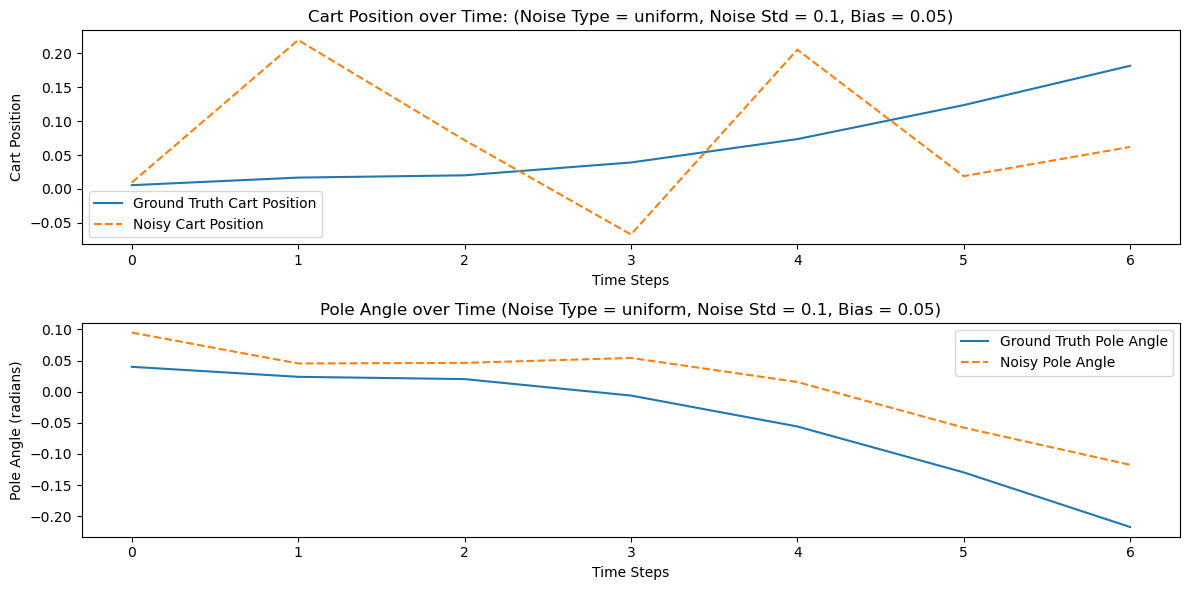

In [13]:
setup_noisy_environment(noise_std=0.1, noise_type='uniform', bias=0.05)

Noisy Observation: [ 0.21352187  0.11933296 -0.03058309 -0.33962247] | Ground Truth: [ 0.0030518   0.3737984   0.03930517 -0.5209853 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.17082741  0.61439211  0.01333837 -0.89846997] | Ground Truth: [ 0.02189468  0.7630598   0.0128649  -1.0844862 ] | Reward: 1.0 | Done: False
Noisy Observation: [-0.00494118  0.48876723 -0.08000291 -0.88726793] | Ground Truth: [ 0.04851129  0.37277085 -0.02458071 -0.4979008 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.17271797  0.5085927  -0.11854864 -0.89681904] | Ground Truth: [ 0.06733131  0.76380897 -0.05050328 -1.1015728 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.03943162  0.4757228  -0.13180125 -0.92489015] | Ground Truth: [ 0.09399523  0.37532765 -0.0890378  -0.55613625] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.29829218  0.08375363 -0.19315982 -0.39159723] | Ground Truth: [ 0.105133   -0.01200067 -0.10601613 -0.03329079] | Reward: 1.0 | Done: False
Noisy Observation: [ 0

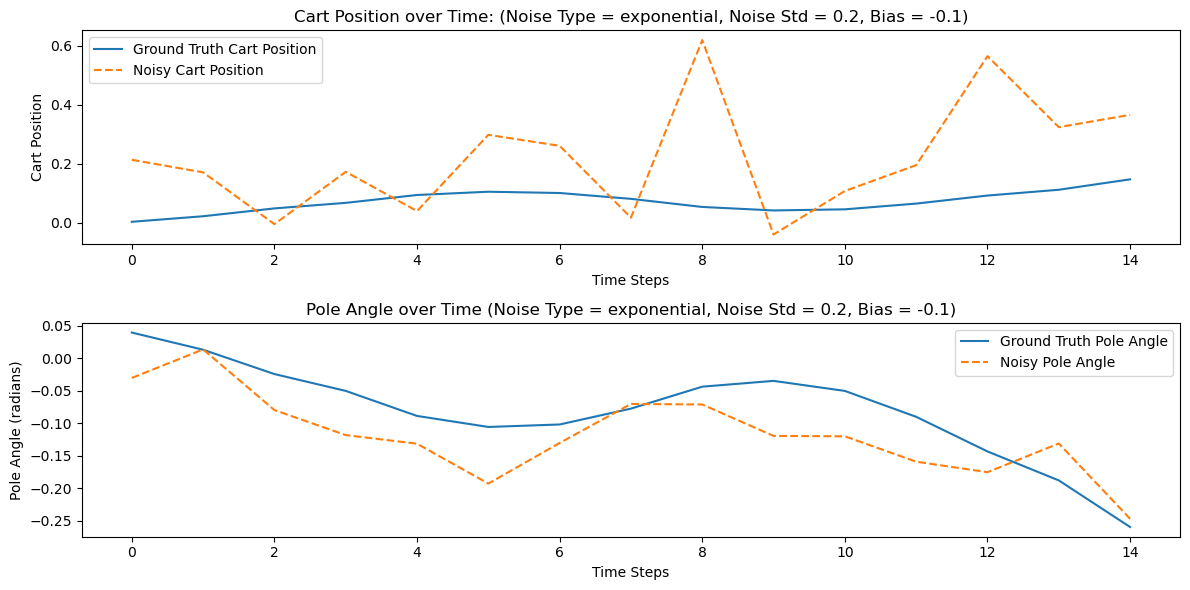

In [14]:
setup_noisy_environment(noise_std=0.2, noise_type='exponential', bias=-0.1)

Noisy Observation: [ 0.13761636 -0.10947395  0.14933841  0.38018358] | Ground Truth: [-0.05312402 -0.42475018  0.02406248  0.5785265 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.09170257 -0.12764663  0.11482939  0.39300608] | Ground Truth: [-0.0662185  -0.0353773   0.04150341  0.0122846 ] | Reward: 1.0 | Done: False
Noisy Observation: [-0.14172576  0.21933282  0.14148029 -0.16740762] | Ground Truth: [-0.06374352  0.35362762  0.0364087  -0.54624814] | Reward: 1.0 | Done: False
Noisy Observation: [-0.03268774  0.62879847  0.12902152 -0.72723201] | Ground Truth: [-0.04570658  0.742984    0.00893892 -1.1118013 ] | Reward: 1.0 | Done: False
Noisy Observation: [-0.10822597  0.99975263  0.05221078 -1.30156319] | Ground Truth: [-0.01208715  1.133272   -0.04133044 -1.6984769 ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0.27479296  1.41305436  0.01759022 -1.90388403] | Ground Truth: [ 0.0371552   1.5246674  -0.11537466 -2.318752  ] | Reward: 1.0 | Done: False
Noisy Observation: [ 0

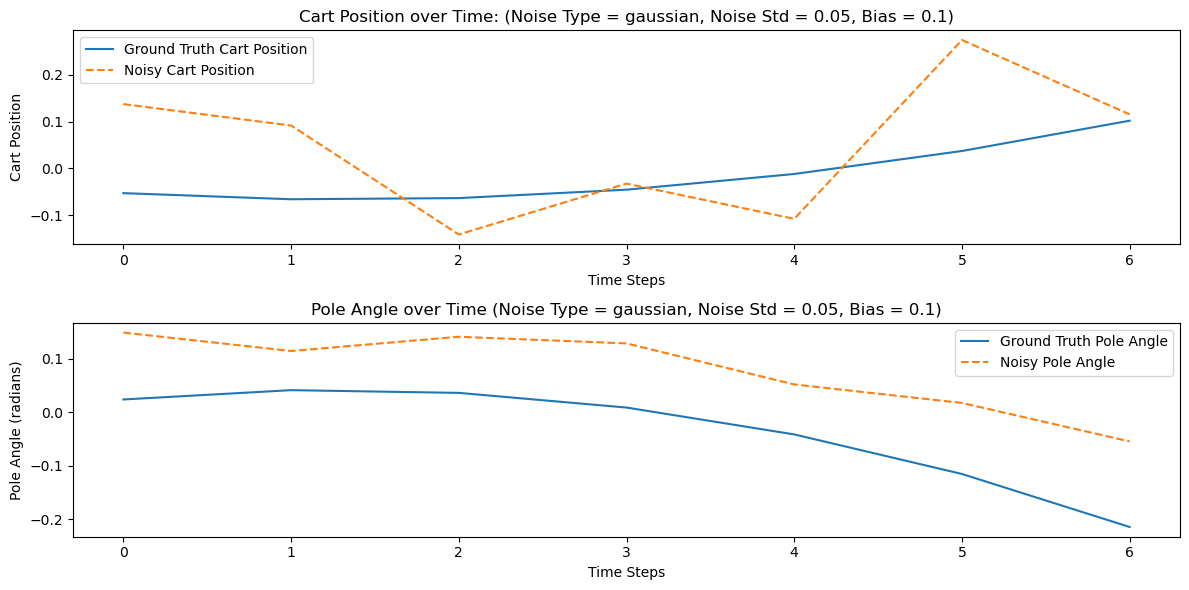

In [15]:
setup_noisy_environment(noise_std=0.05, noise_type='gaussian', bias=0.1)